In [1]:
'''imports'''
'''This file is used for the prediction of stock prices based upon the dataset located here:
    https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs 
    data import, model training, and model testing will all be included in this file
 '''
#main imports 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
'''importing the data'''
df = pd.read_csv('../Datasets/StockPricesData/Stocks/a.us.txt')

df = df.drop(['OpenInt', 'Date', 'High', 'Low', 'Close', 'Volume'], axis=1)

# #train test split
size = df.shape[0]
size80 = int(size*0.6)

dfTrain = df.iloc[:size80] #grabs the train section of the data

#leave a gap for batch size when testing later on
dfTest = df.iloc[size80-60:] #grabs the test data

print(dfTrain)


        Open
0     30.713
1     28.986
2     27.886
3     28.688
4     27.083
...      ...
2707  18.610
2708  18.531
2709  19.220
2710  19.908
2711  19.941

[2712 rows x 1 columns]


In [3]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
dfTrain = sc.fit_transform(dfTrain)
dfTest = sc.fit_transform(dfTest)

In [4]:
#creating batches of time and the labels for each batch for training
xTrain = []
yTrain = []
for i in range(60, len(dfTrain)-1):
    #,0 changes the dimension of the array to 1d
    xTrain.append(dfTrain[i-60:i, 0])
    yTrain.append(dfTrain[i, 0])
    
xTrain, yTrain = np.array(xTrain), np.array(yTrain)
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))
xTrain.shape

(2651, 60, 1)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(xTrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error' )
history = model.fit(xTrain,yTrain,epochs=50,batch_size=32)






Epoch 1/50

83/83 [==============================] - 8s 39ms/step - loss: 0.0043
Epoch 2/50
83/83 [==============================] - 3s 40ms/step - loss: 0.0016
Epoch 3/50
83/83 [==============================] - 3s 39ms/step - loss: 0.0015
Epoch 4/50
83/83 [==============================] - 3s 39ms/step - loss: 0.0012
Epoch 5/50
83/83 [==============================] - 4s 43ms/step - loss: 0.0011
Epoch 6/50
83/83 [==============================] - 4s 45ms/step - loss: 9.9070e-04
Epoch 7/50
83/83 [==============================] - 4s 47ms/step - loss: 0.0012
Epoch 8/50
83/83 [==============================] - 3s 39ms/step - loss: 0.0010
Epoch 9/50
83/83 [==============================] - 3s 38ms/step - loss: 8.5651e-04
Epoch 10/50
83/83 [==============================] - 3s 38ms/step - loss: 9.2926e-04
Epoch 11/50
83/83 [==============================] - 3s 40ms/step - loss: 8.5626e-04
Epoch 12/50
83/83 [==============================] - 3s 38ms/step - loss: 8.8273e-04
Epoch 13/50
83

dict_keys(['loss'])


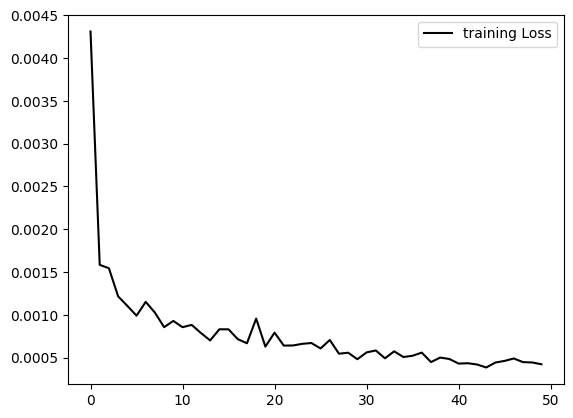

In [6]:
# print(history.params)
print(history.history.keys())
plt.plot(history.history['loss'], color='black', label='training Loss')
plt.legend()
plt.show()

In [7]:
#batch the test set and test the model
xTest = []
yTest = []
for i in range(60, len(dfTest)-1):
    #,0 changes the dimension of the array to 1d
    xTest.append(dfTest[i-60:i, 0])
    yTest.append(dfTest[i, 0])
    
xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
xTest.shape

#get the predictions from the model
stockPred = model.predict(xTest)
stockPred = sc.inverse_transform(stockPred)
testRev = sc.inverse_transform(dfTest)
testRev = testRev[60:]

57/57 [==============================] - 2s 15ms/step


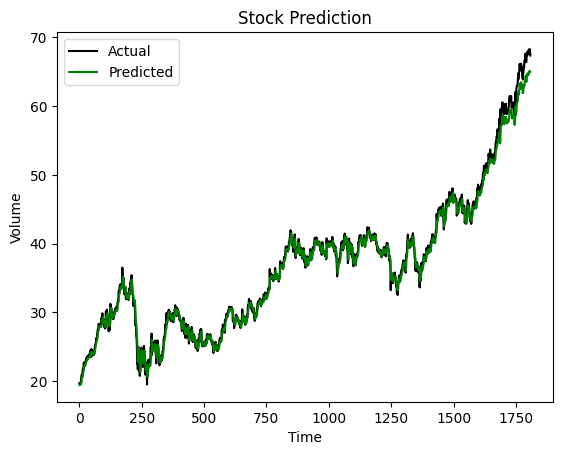

In [8]:
#graph out the results of predictions

plt.plot(testRev, color='black', label='Actual')
plt.plot(stockPred, color='green', label = 'Predicted')

plt.title("Stock Prediction")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()